## Pratik kadam TSF-GRIP
Task 1 : Prediction using Supervised ML

#### Importing Required Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#### Loading Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Checking Outliers

<AxesSubplot:>

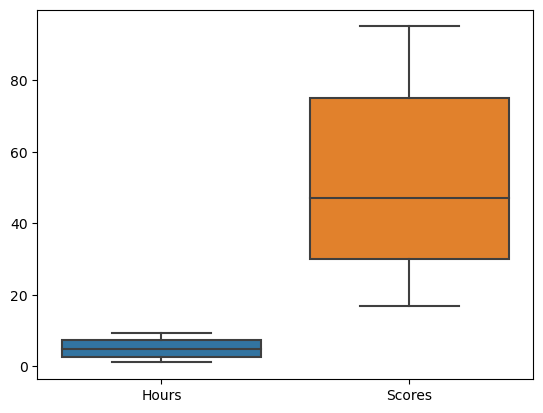

In [5]:
import seaborn as sns
sns.boxplot(data=df)

* No outliers

#### Correlation

In [6]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


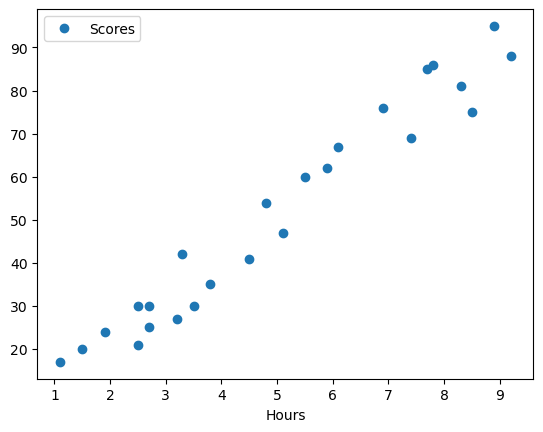

In [7]:
df.plot(x="Hours",y="Scores",style='o')
plt.show()

* from the above graph we can conclude that there is strong positive correlation between Hours and score

#### Data Partition

In [8]:
x=df[['Hours']]
y=df[['Scores']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [9]:
train = pd.concat([X_train,y_train], axis=1)
train.head()

,Hours,Scores
6,9.2,88
12,4.5,41
4,3.5,30
24,7.8,86
0,2.5,21


### Hyphothesis Testing

H0 : - There is no relationship between the Hours & Scores 

                          Vs

H1 : -There is relationship between the Hours & Scores

In [10]:
import statsmodels.formula.api as smf
model = smf.ols('Scores ~ Hours', data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           1.15e-11
Time:                        12:28:39   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4951      3.169      0.472      0.644      -5.260       8.250
Hours          9.8717      0.540     18.288      0.000       8.721      11.022
==============================================================================
Omnibus:                        4.576   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                1.488
Skew:                          -0.198   Prob(JB):                        0.475
Kurtosis:                       1.606   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We Reject Ho

There is relationship between the Score & Hours studied

Accuracy of Model is 95.7%, So Model is Good Fit

Y = 1.4951 + 9.8717 * Hours 

In [11]:
train['fitted_value']=model.fittedvalues # prediction  or fitted value
train['residual']=model.resid  # error or residual

train.head()

,Hours,Scores,fitted_value,residual
6,9.2,88,92.314915,-4.314915
12,4.5,41,45.917857,-4.917857
4,3.5,30,36.046143,-6.046143
24,7.8,86,78.494515,7.505485
0,2.5,21,26.174428,-5.174428


#### Prediction on Test data

In [12]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Hours,Scores
9,2.7,25
22,3.8,35
13,3.3,42
11,5.9,62
5,1.5,20


In [13]:
test['Predicted']=model.predict(test)
test.head()

,Hours,Scores,Predicted
9,2.7,25,28.148771
22,3.8,35,39.007657
13,3.3,42,34.071800
11,5.9,62,59.738257
5,1.5,20,16.302714


### Performance of the Model

#### Train

In [14]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Scores, train.fitted_value)
print('r2 score for perfect model is', np.round(r2,2))

r2 score for perfect model is 0.96


#### Test

In [15]:
from sklearn.metrics import r2_score
r2 = r2_score(test.Scores, test.Predicted)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.93


Model is good fit and performance of test data is also good fit

### What will be predicted score if a student studies for 9.25 hrs/ day?

In [16]:
d1 = {'live':pd.Series(['student1']),
     'Hours':pd.Series([9.25])}
live = pd.DataFrame(d1)
live

,live,Hours
0,student1,9.25


In [17]:
live['Score_Prediction']=np.round(model.predict(live))
live

,live,Hours,Score_Prediction
0,student1,9.25,93.0


* Model Prediction on live data

Model Prediction 93% if student Study 9.25 hour a day